# 🎯 Actividad Grupal: Prediciendo el Comportamiento de Clientes en una Tienda Online

## 🧠 Objetivo
Simular el comportamiento de clientes en una tienda en línea y aplicar conceptos de probabilidad para responder preguntas clave del negocio.

## 🧪 Simulación con Python
Simularemos los datos usando eventos aleatorios:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Número de clientes
n = 1000

# 1. Simulación de entrada al sitio (evento binomial)
entra = np.random.binomial(1, 0.8, n)

# 2. Simulación de compra entre los que entran (evento condicional)
compra = [np.random.binomial(1, 0.3) if e == 1 else 0 for e in entra]

# 3. Número de productos comprados (entre 1 y 5)
cantidad_productos = [np.random.randint(1, 6) if c == 1 else 0 for c in compra]

# 4. Precio por producto (valor aleatorio entre $10 y $100)
precio = [np.random.randint(10, 101) if c > 0 else 0 for c in cantidad_productos]

# 5. Total gastado
total = [cantidad_productos[i] * precio[i] for i in range(n)]

# Crear DataFrame
df = pd.DataFrame({
    "entra": entra,
    "compra": compra,
    "cantidad_productos": cantidad_productos,
    "precio_unitario": precio,
    "total": total
})

df.head()

,entra,compra,cantidad_productos,precio_unitario,total
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,1,5,89,445
4,1,1,2,25,50


## 📊 Visualización de los datos
Analicemos la distribución del total gastado:

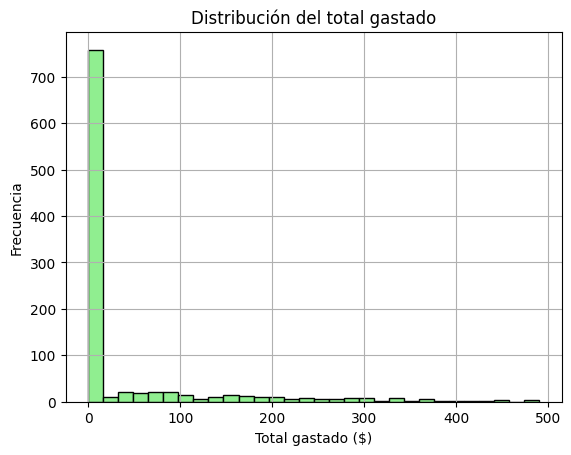

In [ ]:
plt.hist(df["total"], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribución del total gastado")
plt.xlabel("Total gastado ($)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

## 📝 Preguntas para Resolver en Grupo
Responde a cada una en las celdas siguientes:

In [ ]:
prob_estimada = (df["compra"].sum()) / len(df)
print(prob_estimada)

0.244


**1. ¿Cuál es la probabilidad estimada de que un cliente entre y compre?**

**2. ¿Qué distribución sigue el total gastado? ¿Se aproxima a una normal?**

p-value: 1.112875367648326e-45


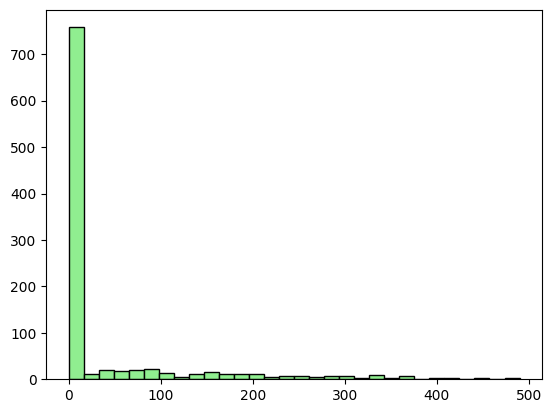

In [ ]:
# Histograma ya lo tienes
plt.hist(df["total"], bins=30, color='lightgreen', edgecolor='black')

# Prueba de normalidad (Shapiro-Wilk)
from scipy.stats import shapiro
stat, p = shapiro(df["total"])
print("p-value:", p)

# Si p < 0.05, rechazamos la hipótesis de normalidad


**3. ¿Cuál es el ingreso promedio de la tienda y su desviación estándar?**

In [ ]:
ingreso_promedio = df["total"].mean()
print("Ingreso promedio:", ingreso_promedio)

Ingreso promedio: 40.218


**4. ¿Cuál es la probabilidad de que un cliente compre más de 3 productos?**

In [ ]:
prob_estimada = (df["cantidad_productos"] > 3).sum() / len(df)
print(prob_estimada)


0.106


**5. Grafiquen un histograma del total gastado y analicen si hay valores atípicos.**

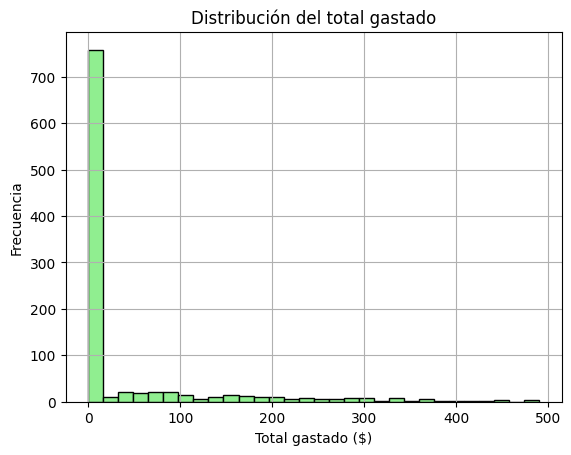

Ingreso promedio: 40.218
Desviación estándar: 89.97772205644273
Q1: 0.0 Q3: 0.0 IQR: 0.0
Límite inferior: 0.0 Límite superior: 0.0
Número de valores atípicos: 244
Ejemplos de outliers:
     entra  compra  cantidad_productos  precio_unitario  total
3       1       1                   5               89    445
4       1       1                   2               25     50
5       1       1                   4               63    252
9       1       1                   3               98    294
15      1       1                   4               86    344


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr

# --- Simulación (tu código base) ---
np.random.seed(42)
n = 1000

entra = np.random.binomial(1, 0.8, n)
compra = [np.random.binomial(1, 0.3) if e == 1 else 0 for e in entra]
cantidad_productos = [np.random.randint(1, 6) if c == 1 else 0 for c in compra]
precio = [np.random.randint(10, 101) if c > 0 else 0 for c in cantidad_productos]
total = [cantidad_productos[i] * precio[i] for i in range(n)]

df = pd.DataFrame({
    "entra": entra,
    "compra": compra,
    "cantidad_productos": cantidad_productos,
    "precio_unitario": precio,
    "total": total
})

# --- Histograma del total gastado ---
plt.hist(df["total"], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribución del total gastado")
plt.xlabel("Total gastado ($)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# --- Análisis de valores atípicos ---
Q1 = df["total"].quantile(0.25)
Q3 = df["total"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["total"] < limite_inferior) | (df["total"] > limite_superior)]

print("Ingreso promedio:", df["total"].mean())
print("Desviación estándar:", df["total"].std())
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
print("Límite inferior:", limite_inferior, "Límite superior:", limite_superior)
print("Número de valores atípicos:", len(outliers))
print("Ejemplos de outliers:\n", outliers.head())

**6. Usando combinatoria: ¿De cuántas maneras distintas se podrían combinar 3 productos si hay un catálogo de 20?**

In [ ]:
import math

# Número total de productos en el catálogo
n = 20
# Número de productos a elegir
k = 3

# Combinaciones (orden NO importa)
combinaciones = math.comb(n, k)

# Permutaciones (orden SÍ importa)
permutaciones = math.perm(n, k)

print(f"Combinaciones de {k} productos de {n}: {combinaciones}")
print(f"Permutaciones de {k} productos de {n}: {permutaciones}")

Combinaciones de 3 productos de 20: 1140
Permutaciones de 3 productos de 20: 6840


In [ ]:
# Filtrar clientes que gastaron más de 0
df_filtrado = df[df["total"] > 0]

# Mostrar las primeras filas del nuevo DataFrame
print(df_filtrado.head())

# Opcional: verificar cuántos clientes quedaron
print("Número de clientes que compraron:", len(df_filtrado))


    entra  compra  cantidad_productos  precio_unitario  total
3       1       1                   5               89    445
4       1       1                   2               25     50
5       1       1                   4               63    252
9       1       1                   3               98    294
15      1       1                   4               86    344
Número de clientes que compraron: 244


In [ ]:
# Filtrar clientes que entraron y gastaron más de $0
df_filtrado = df[(df["entra"] == 1) & (df["total"] > 0)]

# Mostrar los primeros registros filtrados
print(df_filtrado.head())

# Ver cuántos clientes cumplen esta condición
print("Clientes que entraron y compraron:", len(df_filtrado))


    entra  compra  cantidad_productos  precio_unitario  total
3       1       1                   5               89    445
4       1       1                   2               25     50
5       1       1                   4               63    252
9       1       1                   3               98    294
15      1       1                   4               86    344
Clientes que entraron y compraron: 244
